In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


--2019-01-05 21:12:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/zip]
Saving to: ‘AirQualityUCI.zip’

     0K .......... .......... .......... .......... ..........  3% 84.0K 17s
    50K .......... .......... .......... .......... ..........  6%  129K 14s
   100K .......... .......... .......... .......... ..........  9%  244K 11s
   150K .......... .......... .......... .......... .......... 13%  253K 9s
   200K .......... .......... .......... .......... .......... 16%  254K 8s
   250K .......... .......... .......... .......... .......... 19%  264K 7s
   300K .......... .......... .......... .......... .......... 23%  448K 6s
   350K .......... .......... .......... .......... .......... 26%  496K 5s
  

In [43]:
df = pd.read_csv('AirQualityUCI.csv', sep=';')
df.drop(df.columns[-2:], axis=1, inplace=True)
df = df[~df.Date.isna()]
df.Time = df.Time.apply(lambda x: int(x[:2]))

df['Date'] = pd.to_datetime(df.Date)
df['Date'] = [date.replace(hour=h) for date, h in zip(df['Date'], df['Time'])]
df.drop('Time', axis=1, inplace=True)
df.sort_values('Date', inplace=True)

df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-10-03 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-10-03 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-10-03 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-10-03 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


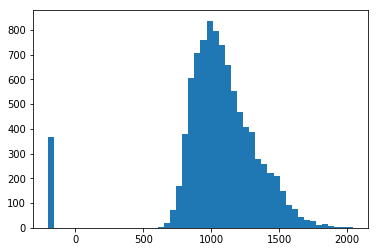

In [45]:
plt.hist(df['PT08.S1(CO)'], bins=50)
plt.show()

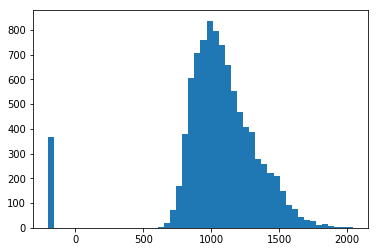

In [51]:
fig, ax = plt.subplots()
ax.hist(df['PT08.S1(CO)'], bins=50)
plt.show()

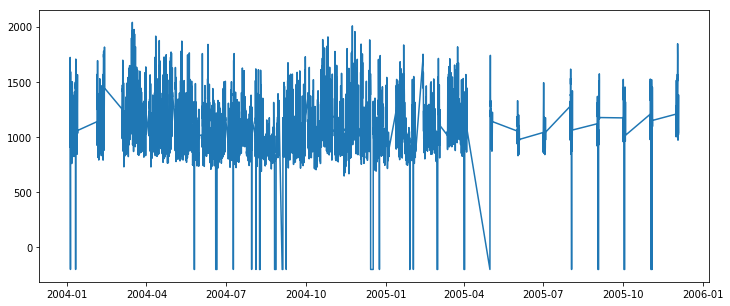

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.Date.values, df['PT08.S1(CO)'].values)
plt.show()

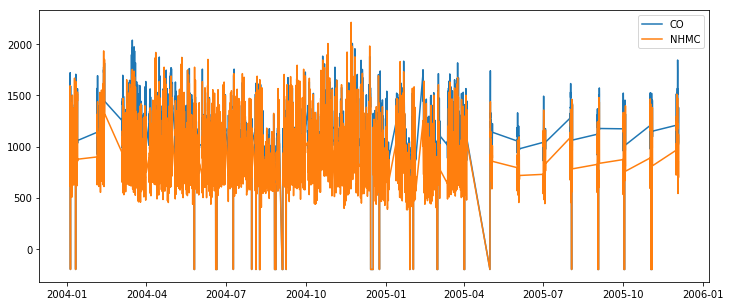

In [63]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.Date.values, df['PT08.S1(CO)'].values, label='CO')
ax.plot(df.Date.values, df['PT08.S2(NMHC)'].values, label='NHMC')
ax.legend()
plt.show()

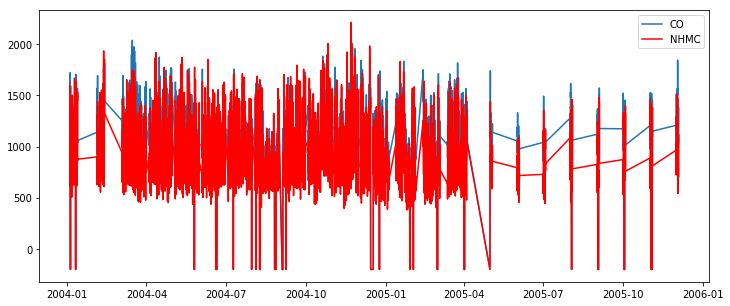

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.Date.values, df['PT08.S1(CO)'].values, label='CO')
ax.plot(df.Date.values, df['PT08.S2(NMHC)'].values, c='r', label='NHMC')
ax.legend()
plt.show()

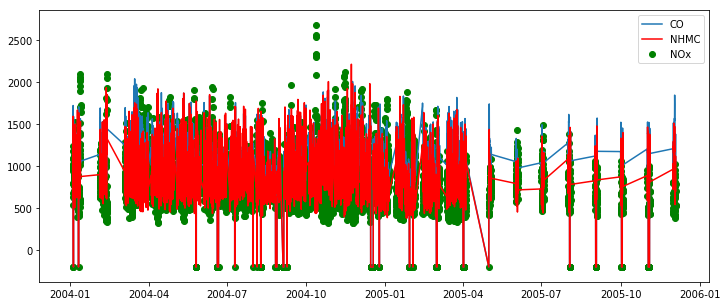

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.Date.values, df['PT08.S1(CO)'].values, label='CO')
ax.plot(df.Date.values, df['PT08.S2(NMHC)'].values, c='r', label='NHMC')
ax.scatter(df.Date.values, df['PT08.S3(NOx)'], c='g', label='NOx')
ax.legend()
plt.show()

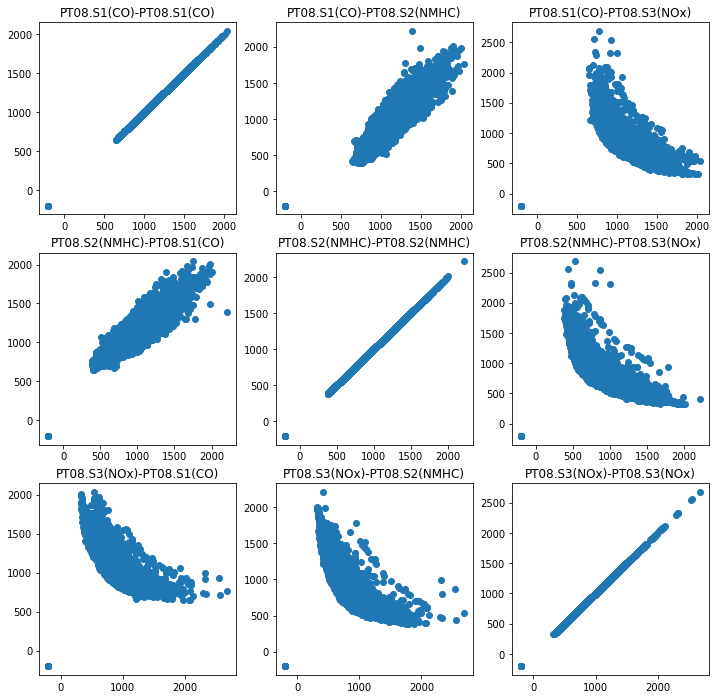

In [77]:
columns = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)']

fig, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    col1 = columns[i]
    for j in range(3):
        col2 = columns[j]
        ax[i][j].set_title(f'{col1}-{col2}')
        ax[i][j].scatter(df[col1], df[col2])
plt.show()        

In [78]:
fig.savefig('correlations')

In [79]:
fig.show()

/Users/sachin/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
